In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
df = pd.read_csv('scores_data.csv')
df

,Batch,User_ID,Score
0,AI_ELITE_7,uid_149,6 / 7
1,AI_ELITE_7,uid_148,6 / 7
2,AI_ELITE_7,uid_147,7 / 7
3,AI_ELITE_7,uid_146,7 / 7
4,AI_ELITE_7,uid_145,4 / 7
...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7
145,AI_ELITE_4,uid_4,4 / 7
146,AI_ELITE_4,uid_3,4 / 7
147,AI_ELITE_4,uid_2,3 / 7


In [44]:
df.columns = df.columns.str.strip()

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Batch          149 non-null    category
 1   User_ID        149 non-null    object  
 2   perform_Score  149 non-null    int32   
 3   Total_Score    149 non-null    int32   
dtypes: category(1), int32(2), object(1)
memory usage: 2.7+ KB


In [55]:
df.isnull().sum()

Batch            0
User_ID          0
perform_Score    0
Total_Score      0
dtype: int64

In [58]:
df.duplicated().sum()

0

In [45]:
df['Batch'] = df['Batch'].astype('category')

In [46]:
df["perform_Score"] = (df["Score"].astype(str).str.split("/").str[0].str.strip().astype(int))
df["Total_Score"] = (df["Score"].astype(str).str.split("/").str[1].str.strip().astype(int))

In [47]:
df

,Batch,User_ID,Score,perform_Score,Total_Score
0,AI_ELITE_7,uid_149,6 / 7,6,7
1,AI_ELITE_7,uid_148,6 / 7,6,7
2,AI_ELITE_7,uid_147,7 / 7,7,7
3,AI_ELITE_7,uid_146,7 / 7,7,7
4,AI_ELITE_7,uid_145,4 / 7,4,7
...,...,...,...,...,...
144,AI_ELITE_4,uid_5,4 / 7,4,7
145,AI_ELITE_4,uid_4,4 / 7,4,7
146,AI_ELITE_4,uid_3,4 / 7,4,7
147,AI_ELITE_4,uid_2,3 / 7,3,7


In [48]:
df.columns

Index(['Batch', 'User_ID', 'Score', 'perform_Score', 'Total_Score'], dtype='object')

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Batch          149 non-null    category
 1   User_ID        149 non-null    object  
 2   Score          149 non-null    object  
 3   perform_Score  149 non-null    int32   
 4   Total_Score    149 non-null    int32   
dtypes: category(1), int32(2), object(2)
memory usage: 3.9+ KB


In [50]:
df = df.drop('Score', axis=1)


In [51]:
df

,Batch,User_ID,perform_Score,Total_Score
0,AI_ELITE_7,uid_149,6,7
1,AI_ELITE_7,uid_148,6,7
2,AI_ELITE_7,uid_147,7,7
3,AI_ELITE_7,uid_146,7,7
4,AI_ELITE_7,uid_145,4,7
...,...,...,...,...
144,AI_ELITE_4,uid_5,4,7
145,AI_ELITE_4,uid_4,4,7
146,AI_ELITE_4,uid_3,4,7
147,AI_ELITE_4,uid_2,3,7


In [59]:
Students_per_Batch = df['Batch'].value_counts()

In [60]:
Students_per_Batch

Batch
AI_ELITE_7    53
AI_ELITE_4    48
AI_ELITE_6    48
Name: count, dtype: int64

In [64]:
pivot_df = pd.pivot_table(
    df,
    index="perform_Score",
    columns="Batch",
    values="User_ID",
    aggfunc="count",
    fill_value=0
)
pivot_df

C:\Users\user\AppData\Local\Temp\ipykernel_7648\2744543448.py:1: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_df = pd.pivot_table(


Batch,AI_ELITE_4,AI_ELITE_6,AI_ELITE_7
perform_Score,,,
0,1,1,0
1,1,2,0
2,7,3,2
3,8,9,7
4,19,11,10
5,8,13,11
6,1,4,13
7,3,5,10


In [65]:
batch_stats = df.groupby('Batch')['perform_Score'].agg(
    count="count",
    mean="mean",
    median="median",
    min="min",
    max="max",
    std="std"
)
batch_stats

C:\Users\user\AppData\Local\Temp\ipykernel_7648\1061121319.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_stats = df.groupby('Batch')['perform_Score'].agg(


,count,mean,median,min,max,std
Batch,,,,,,
AI_ELITE_4,48,3.791667,4.0,0,7,1.443376
AI_ELITE_6,48,4.229167,4.0,0,7,1.640441
AI_ELITE_7,53,5.056604,5.0,2,7,1.446682


## Visualisation

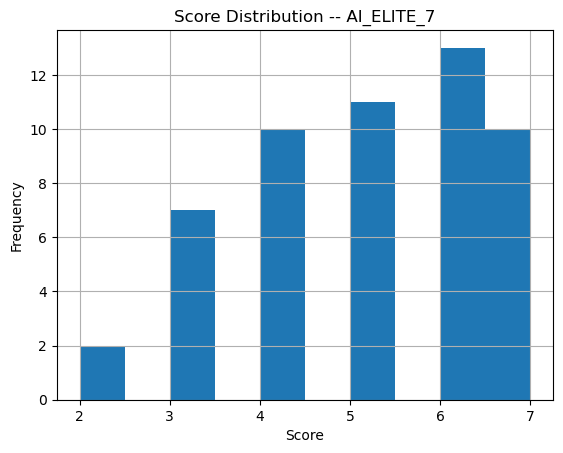

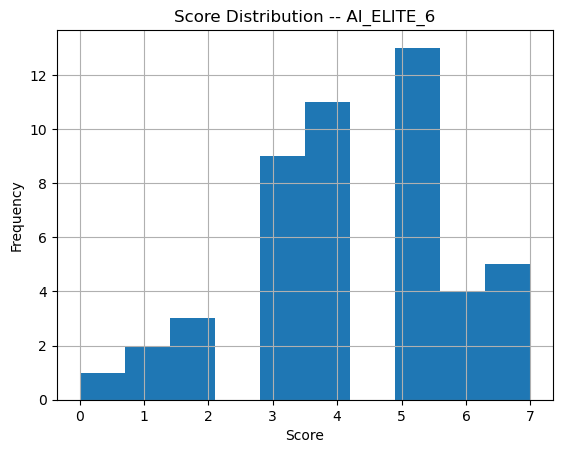

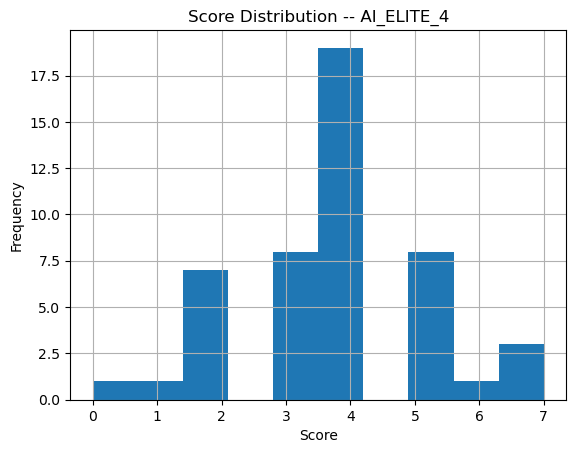

In [84]:
for i in df['Batch'].unique():
    plt.figure()
    plt.hist(df[df['Batch']==i]['perform_Score'])
    plt.xlabel('Score')
    plt.ylabel('Frequency')
    plt.title(f"Score Distribution -- {i}")
    plt.grid()

    plt.show()

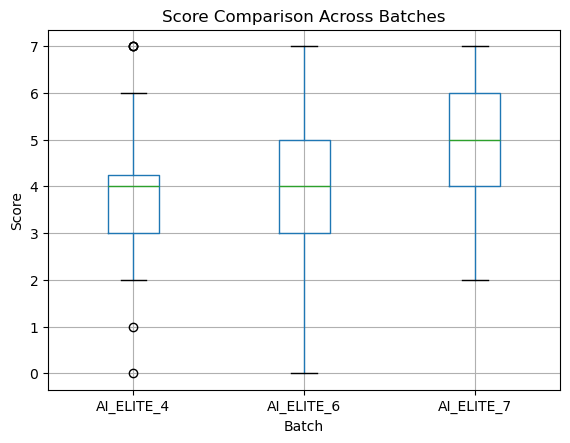

In [71]:
df.boxplot(column="perform_Score", by="Batch")
plt.title("Score Comparison Across Batches")
plt.suptitle("")
plt.xlabel("Batch")
plt.ylabel("Score")
plt.show()

## High_Ranking_Batch

In [85]:
batch_ranking = df.groupby("Batch")["perform_Score"].mean().sort_values(ascending=False)
batch_ranking.round(2)

C:\Users\user\AppData\Local\Temp\ipykernel_7648\1572170980.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  batch_ranking = df.groupby("Batch")["perform_Score"].mean().sort_values(ascending=False)


Batch
AI_ELITE_7    5.06
AI_ELITE_6    4.23
AI_ELITE_4    3.79
Name: perform_Score, dtype: float64

In [91]:
# High_Scores 
top_users = df.loc[df.groupby('Batch')['perform_Score'].idxmax(),
                   ['Batch', 'User_ID']]
top_users

C:\Users\user\AppData\Local\Temp\ipykernel_7648\2454933828.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_users = df.loc[df.groupby('Batch')['perform_Score'].idxmax(),


,Batch,User_ID
101,AI_ELITE_4,uid_48
63,AI_ELITE_6,uid_86
2,AI_ELITE_7,uid_147


In [94]:
consistency = df.groupby("Batch")["perform_Score"].std().sort_values()
print(f"Best performing batch (highest average score): {batch_ranking.index[0]}")
print(f"Most consistent batch (lowest score variation): {consistency.index[0]}")

Best performing batch (highest average score): AI_ELITE_7
Most consistent batch (lowest score variation): AI_ELITE_4


C:\Users\user\AppData\Local\Temp\ipykernel_7648\1897618202.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consistency = df.groupby("Batch")["perform_Score"].std().sort_values()


In [95]:
stats.f_oneway(
    df[df['Batch']=='AI_ELITE_4']['perform_Score'],
    df[df['Batch']=='AI_ELITE_6']['perform_Score'],
    df[df['Batch']=='AI_ELITE_7']['perform_Score']
)

F_onewayResult(statistic=9.194085228606145, pvalue=0.00017346323549509082)

### There is a significant difference in performance across batches.